# Costly conversion - pricing optimization for the software company

Company XYZ sells a software for 39 dollars. Since revenue has been flat for some time, the VP of Product has decided to run a test increasing the price. She hopes that this would increase revenue.

In the experiment, 66% of the users have seen the old price (39 dollars), while a random sample of 33 percent users a higher price (59 dollars).

The test has been running for some time and the VP of Product is interested in understanding how it went and whether it would make sense to increase the price for all the users. 

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from numpy import linalg as la
from scipy.stats import binom

In [3]:
pd_users = pd.read_csv("user_table.csv")
pd_results = pd.read_csv("test_results.csv")

In [4]:
pd_users.head()

,user_id,city,country,lat,long
0,510335,Peabody,USA,42.53,-70.97
1,89568,Reno,USA,39.54,-119.82
2,434134,Rialto,USA,34.11,-117.39
3,289769,Carson City,USA,39.15,-119.74
4,939586,Chicago,USA,41.84,-87.68


In [5]:
pd_results.head()

,user_id,timestamp,source,device,operative_system,test,price,converted
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0


In [6]:
#unique users in table pd_users
len(pd_users.user_id.unique()) == len(pd_users)

True

In [7]:
#there are users in results table that don't exist in users table
print(len(pd_results.user_id.unique()) == len(pd_results))
print(len(pd_users))

True
275616


In [8]:
len(pd_results.test[pd_results.test == 1])/len(pd_results)*100

36.00789141414141

In [9]:
df = pd.merge(pd_users, pd_results, on='user_id')

In [10]:
len(df)

275616

In [11]:
len(df[df.test == 1])/len(df)*100

35.987751073957966

In [12]:
#how many total made a purchase
len(df.converted[df.converted == 1])/len(df)*100

1.8210118425635666

In [13]:
#how many total made a purchase
len(df.converted[df.converted == 0])/len(df)*100

98.17898815743644

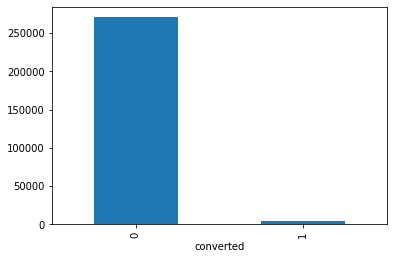

In [14]:
#purchase vs no-purchase
fig = plt.figure()
df.groupby('converted').converted.count().plot.bar(ylim=0)

In [15]:
#intervention or no intervention, how many was converted
#higher price observed, less purchases
#this should be normalized to the number in each intrvention

fig = plt.figure()
print(len(df[(df.test == 0) & (df.converted == 1)]))
print(len(df[(df.test == 1) & (df.converted == 1)]))

print(len(df[(df.test == 0) & (df.converted == 1)])/len(df[df.test == 0])*100)
print(len(df[(df.test == 1) & (df.converted == 1)])/len(df[df.test == 1])*100)

3489
1530
1.9775772553109483
1.5425253054805017


<Figure size 432x288 with 0 Axes>

In [16]:
#hypothesis testing, defining control and treatment group
control = df[df.test == 0]
treatment = df[df.test ==1]

In [17]:
#define a baseline conversion rate
bcr = len(control[control.converted == 1])/len(control)
#what difference in a conversion rate would we consider significant - at least 4% increase in conversions
d_hat = 0.04

In [23]:
ab_summary = df.pivot_table(values = 'converted', index = 'test', aggfunc = lambda x: len(x))
ab_summary['rate'] = df.pivot_table(values='converted', index = 'test')

In [26]:
ab_summary

,converted,rate
test,,
0,176428,0.019776
1,99188,0.015425


In [71]:
# there was actually a decrease in conversion
diff = ab_summary['rate'][1]-ab_summary['rate'][0]
print(diff)
A_cr = ab_summary['rate'][0] 
B_cr = ab_summary['rate'][1]
#A_converted = control.converted[control.converted == 1]
#B_converted = treatment.converted[treatment.converted == 1]
A_total = ab_summary['converted'][0]
B_total = ab_summary['converted'][1]

-0.004350519498304466


In [72]:
A_converted = ab_summary['converted'][0]
B_converted = ab_summary['converted'][1]
print(A_converted)

176428


Text(0, 0.5, 'probability')

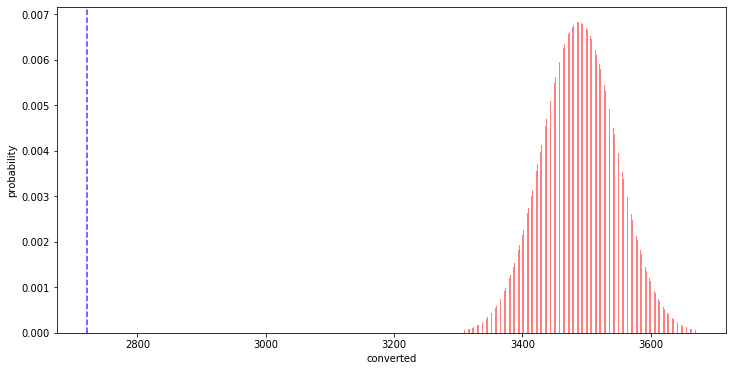

In [82]:
fig, ax = plt.subplots(figsize=(12,6))
x = np.arange(binom.ppf(0.001, A_total, A_cr), binom.ppf(0.999, A_total, A_cr),2)
y = binom(A_total, A_cr).pmf(x)
ax.bar(x, y, alpha=0.5, color='red')
ax.axvline(x=B_cr * A_total, c='blue', alpha=0.75, linestyle='--')
plt.xlabel('converted')
plt.ylabel('probability')

Binomial distributions for the control(blue) and the treatment (red)

Text(0, 0.5, 'probability')

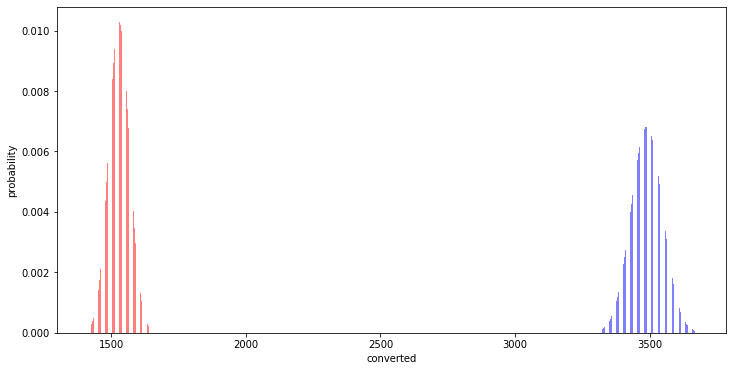

In [81]:
fig, ax = plt.subplots(figsize=(12,6))
xA = np.arange(binom.ppf(0.001, A_total, A_cr), binom.ppf(0.999, A_total, A_cr),2)
yA = binom(A_total, A_cr).pmf(xA)
ax.bar(xA, yA, alpha=0.5, color = 'blue')
xB = np.arange(binom.ppf(0.001, B_total, B_cr), binom.ppf(0.999, B_total, B_cr),2)
yB = binom(B_total, B_cr).pmf(xB)
ax.bar(xB, yB, alpha=0.5, color = 'red')
plt.xlabel('converted')
plt.ylabel('probability')

In [84]:
# standard error of the mean for both groups
SE_A = np.sqrt(A_cr * (1-A_cr)) / np.sqrt(A_total)
SE_B = np.sqrt(B_cr * (1-B_cr)) / np.sqrt(B_total)

ValueError: Improper number of dimensions to norm.

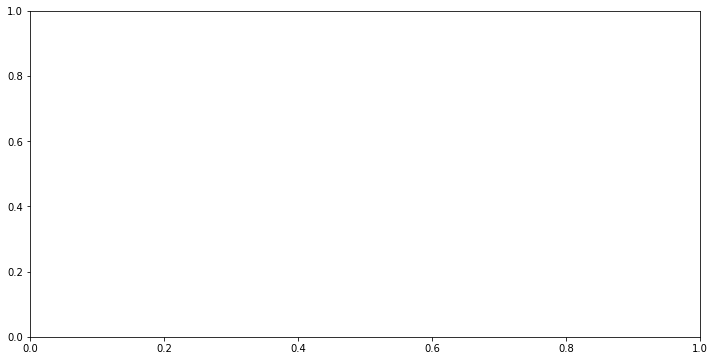

In [91]:
# plot the null and alternate hypothesis
fig, ax = plt.subplots(figsize=(12,6))
x = np.linspace(1000, .2, 4000)
#x = np.arange(binom.ppf(0.001, A_total, A_cr), binom.ppf(0.999, A_total, A_cr),2)
yA = la.norm(A_cr, SE_A).pdf(x)
ax.plot(xA, yA)
ax.axvline(x=A_cr, c='red', alpha=0.5, linestyle='--')
yB = la.norm(B_cr, SE_B).pdf(x)
ax.plot(xB, yB)
ax.axvline(x=B_cr, c='blue', alpha=0.5, linestyle='--')
plt.xlabel('Converted Proportion')
plt.ylabel('PDF')